# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd

# Read the training data from the txt file
with open("/content/stsa-train.txt", "r") as file:
    data = file.readlines()

# Splitting the data
train_labels = [int(line.split()[0]) for line in data]
train_texts = [" ".join(line.split()[1:]) for line in data]

# Create a DataFrame
train_data = pd.DataFrame({"Review": train_labels, "Comment": train_texts})
train_data.head()

In [ ]:
#Reading the testing data
with open("/content/stsa-test.txt", "r") as file:
    data = file.readlines()

# Splitting the data
test_labels = [int(line.split()[0]) for line in data]
test_texts = [" ".join(line.split()[1:]) for line in data]

# Create a DataFrame
test_data = pd.DataFrame({"Review": test_labels, "Comment": test_texts})
test_data.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the training data into features (X) and labels (y)
X_train, X_val, y_train, y_val = train_test_split(train_data['Comment'], train_data['Review'], test_size=0.2, random_state=42)

# Splitting the testing data into features (X) and labels (y)
X_test, y_test = test_data['Comment'], test_data['Review']

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

###MultinominalNB

In [ ]:
# Initialize and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val_vectorized)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", round(accuracy*100),"%")
print("Precision:", round(precision*100),"%")
print("Recall:", round(recall*100),"%")
print("F1 Score:", round(f1*100),"%")

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Create a pipeline with CountVectorizer and MultinomialNB
pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

# Perform 10-fold cross-validation
scores = cross_val_score(pipeline, train_data['Comment'], train_data['Review'], cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", round(scores.mean()*100),"%")

In [ ]:
#evaluating on the test set
y_test_pred = clf.predict(X_test_vectorized)

# Calculating evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Accuracy:", round(accuracy_test*100),"%")
print("Precision:", round(precision_test*100),"%")
print("Recall:", round(recall_test*100),"%")
print("F1 Score:", round(f1_test*100),"%")

In [ ]:
# Generate classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Perform 10-fold cross-validation
scores_test = cross_val_score(pipeline, test_data['Comment'], test_data['Review'], cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores_test)
print("Mean accuracy:", round(scores_test.mean()*100),"%")

###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
y_val_pred_svm = svm_clf.predict(X_val_vectorized)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
precision_svm = precision_score(y_val, y_val_pred_svm)
recall_svm = recall_score(y_val, y_val_pred_svm)
f1_svm = f1_score(y_val, y_val_pred_svm)

# Print the evaluation metrics
print("Validation Set Metrics for SVM:")
print("Accuracy:", round(accuracy_svm*100),"%")
print("Precision:", round(precision_svm*100),"%")
print("Recall:", round(recall_svm*100),"%")
print("F1 Score:", round(f1_svm*100),"%")

In [ ]:
from sklearn.metrics import classification_report

# Generating classification report
print("Classification Report for Validation Set (SVM):")
print(classification_report(y_val, y_val_pred_svm))

In [14]:
# Create a pipeline with CountVectorizer and SVC
svm_pipeline = make_pipeline(CountVectorizer(), SVC())

# Perform 10-fold cross-validation
svm_scores = cross_val_score(svm_pipeline, train_data['Comment'], train_data['Review'], cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores for SVM:")
print(svm_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy for SVM:", round(svm_scores.mean()*100),"%")

Cross-validation scores for SVM:
[0.76445087 0.75144509 0.75433526 0.74277457 0.73554913 0.77890173
 0.74277457 0.75722543 0.76300578 0.76734104]
Mean accuracy for SVM: 76 %


In [15]:
#evaluating the test set
y_test_pred_svm = svm_clf.predict(X_test_vectorized)

# Calculating evaluation metrics on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_test_svm = precision_score(y_test, y_test_pred_svm)
recall_test_svm = recall_score(y_test, y_test_pred_svm)
f1_test_svm = f1_score(y_test, y_test_pred_svm)

print("\nTest Set Metrics for SVM:")
print("Accuracy:", round(accuracy_test_svm*100),"%")
print("Precision:", round(precision_test_svm*100),"%")
print("Recall:", round(recall_test_svm*100),"%")
print("F1 Score:", round(f1_test_svm*100),"%")


Test Set Metrics for SVM:
Accuracy: 76 %
Precision: 73 %
Recall: 80 %
F1 Score: 77 %


In [16]:
# Generate classification report for the test set
print("\nClassification Report for Test Set (SVM):")
print(classification_report(y_test, y_test_pred_svm))


Classification Report for Test Set (SVM):
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       912
           1       0.73      0.80      0.77       909

    accuracy                           0.76      1821
   macro avg       0.76      0.76      0.76      1821
weighted avg       0.76      0.76      0.76      1821



In [17]:
# Perform 10-fold cross-validation on the testing data
svm_scores_test = cross_val_score(svm_pipeline, test_data['Comment'], test_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for SVM on testing data:")
print(svm_scores_test)
print("Mean accuracy for SVM on testing data:", svm_scores_test.mean())

Cross-validation scores for SVM on testing data:
[0.67213115 0.6978022  0.61538462 0.68681319 0.62087912 0.67032967
 0.65934066 0.73076923 0.74175824 0.67582418]
Mean accuracy for SVM on testing data: 0.6771032246442082


###KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_vectorized, y_train)

# Making predictions on the validation set
y_val_pred_knn = knn_clf.predict(X_val_vectorized)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
precision_knn = precision_score(y_val, y_val_pred_knn)
recall_knn = recall_score(y_val, y_val_pred_knn)
f1_knn = f1_score(y_val, y_val_pred_knn)

print("Validation Set Metrics for KNN:")
print("Accuracy:", round(accuracy_knn*100),"%")
print("Precision:", round(precision_knn*100),"%")
print("Recall:", round(recall_knn*100),"%")
print("F1 Score:", round(f1_knn*100),"%")

Validation Set Metrics for KNN:
Accuracy: 62 %
Precision: 62 %
Recall: 65 %
F1 Score: 64 %


In [19]:
# Generating classification report for the validation set
print("Classification Report for Validation Set (KNN):")
print(classification_report(y_val, y_val_pred_knn))

Classification Report for Validation Set (KNN):
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       671
           1       0.62      0.65      0.64       713

    accuracy                           0.62      1384
   macro avg       0.62      0.62      0.62      1384
weighted avg       0.62      0.62      0.62      1384



In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Create a pipeline with CountVectorizer and KNeighborsClassifier
knn_pipeline = make_pipeline(CountVectorizer(), KNeighborsClassifier())

# Perform 10-fold cross-validation
knn_scores = cross_val_score(knn_pipeline, train_data['Comment'], train_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for KNN:")
print(knn_scores)
print("Mean accuracy for KNN:", round(knn_scores.mean()*100),"%")

Cross-validation scores for KNN:
[0.59393064 0.5765896  0.57514451 0.57514451 0.57225434 0.57369942
 0.57369942 0.59248555 0.61127168 0.58381503]
Mean accuracy for KNN: 58 %


In [21]:
#evaluating the test set
y_test_pred_knn = knn_clf.predict(X_test_vectorized)

# Calculate evaluation metrics on the test set
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test_knn = precision_score(y_test, y_test_pred_knn)
recall_test_knn = recall_score(y_test, y_test_pred_knn)
f1_test_knn = f1_score(y_test, y_test_pred_knn)

# Print the evaluation metrics on the test set
print("\nTest Set Metrics for KNN:")
print("Accuracy:", round(accuracy_test_knn*100),"%")
print("Precision:", round(precision_test_knn*100),"%")
print("Recall:", round(recall_test_knn*100),"%")
print("F1 Score:", round(f1_test_knn*100),"%")


Test Set Metrics for KNN:
Accuracy: 58 %
Precision: 58 %
Recall: 62 %
F1 Score: 60 %


In [22]:
# Generating classification report for the test set
print("\nClassification Report for Test Set (KNN):")
print(classification_report(y_test, y_test_pred_knn))


Classification Report for Test Set (KNN):
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       912
           1       0.58      0.62      0.60       909

    accuracy                           0.58      1821
   macro avg       0.58      0.58      0.58      1821
weighted avg       0.58      0.58      0.58      1821



In [23]:
# Perform 10-fold cross-validation
knn_scores_test = cross_val_score(knn_pipeline, test_data['Comment'], test_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for KNN:")
print(knn_scores_test)
print("Mean accuracy for KNN:", round(knn_scores_test.mean()*100),"%")

Cross-validation scores for KNN:
[0.62295082 0.57692308 0.53296703 0.6043956  0.44505495 0.55494505
 0.45054945 0.54945055 0.60989011 0.63186813]
Mean accuracy for KNN: 56 %


###Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
y_val_pred_dt = dt_clf.predict(X_val_vectorized)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
precision_dt = precision_score(y_val, y_val_pred_dt)
recall_dt = recall_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)

print("Validation Set Metrics for Decision Tree:")
print("Accuracy:", round(accuracy_dt*100),"%")
print("Precision:", round(precision_dt*100),"%")
print("Recall:", round(recall_dt*100),"%")
print("F1 Score:", round(f1_dt*100),"%")

Validation Set Metrics for Decision Tree:
Accuracy: 65 %
Precision: 65 %
Recall: 70 %
F1 Score: 67 %


In [25]:
# Generating classification report for the validation set
print("Classification Report for Validation Set (Decision Tree):")
print(classification_report(y_val, y_val_pred_dt))

Classification Report for Validation Set (Decision Tree):
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       671
           1       0.65      0.70      0.67       713

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Create a pipeline with CountVectorizer and DecisionTreeClassifier
dt_pipeline = make_pipeline(CountVectorizer(), DecisionTreeClassifier())

# Perform 10-fold cross-validation
dt_scores = cross_val_score(dt_pipeline, train_data['Comment'], train_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for Decision Tree:")
print(dt_scores)
print("Mean accuracy for Decision Tree:", round(dt_scores.mean()*100),"%")

Cross-validation scores for Decision Tree:
[0.61416185 0.6416185  0.61560694 0.62427746 0.65606936 0.66040462
 0.63728324 0.67052023 0.66618497 0.64017341]
Mean accuracy for Decision Tree: 64 %


In [27]:
# Evaluation on the test set
y_test_pred_dt = dt_clf.predict(X_test_vectorized)

# Calculate evaluation metrics on the test set
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
precision_test_dt = precision_score(y_test, y_test_pred_dt)
recall_test_dt = recall_score(y_test, y_test_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)

print("\nTest Set Metrics for Decision Tree:")
print("Accuracy:", accuracy_test_dt)
print("Precision:", precision_test_dt)
print("Recall:", recall_test_dt)
print("F1 Score:", f1_test_dt)


Test Set Metrics for Decision Tree:
Accuracy: 0.6386600768808347
Precision: 0.6287179487179487
Recall: 0.6743674367436744
F1 Score: 0.6507430997876859


In [28]:
# Generating classification report for the test set
print("\nClassification Report for Test Set (Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))


Classification Report for Test Set (Decision Tree):
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       912
           1       0.63      0.67      0.65       909

    accuracy                           0.64      1821
   macro avg       0.64      0.64      0.64      1821
weighted avg       0.64      0.64      0.64      1821



In [29]:
# Perform 10-fold cross-validation
dt_scores_test = cross_val_score(dt_pipeline, test_data['Comment'], test_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for Decision Tree:")
print(dt_scores_test)
print("Mean accuracy for Decision Tree:", round(dt_scores_test.mean()*100),"%")

Cross-validation scores for Decision Tree:
[0.67759563 0.6043956  0.62637363 0.55494505 0.59340659 0.57692308
 0.60989011 0.59340659 0.58241758 0.62637363]
Mean accuracy for Decision Tree: 60 %


###Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_clf.predict(X_val_vectorized)

# Calculating evaluation metrics
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

print("Validation Set Metrics for Random Forest:")
print("Accuracy:", round(accuracy_rf*100),"%")
print("Precision:", round(precision_rf*100),"%")
print("Recall:", round(recall_rf*100),"%")
print("F1 Score:", round(f1_rf*100),"%")

Validation Set Metrics for Random Forest:
Accuracy: 74 %
Precision: 73 %
Recall: 80 %
F1 Score: 76 %


In [31]:
# Generate classification report for the validation set
print("Classification Report for Validation Set (Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

Classification Report for Validation Set (Random Forest):
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       671
           1       0.73      0.80      0.76       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Creating a pipeline with CountVectorizer and RandomForestClassifier
rf_pipeline = make_pipeline(CountVectorizer(), RandomForestClassifier())

# Performing 10-fold cross-validation
rf_scores = cross_val_score(rf_pipeline, train_data['Comment'], train_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for Random Forest:")
print(rf_scores)
print("Mean accuracy for Random Forest:", round(rf_scores.mean()*100),"%")

Cross-validation scores for Random Forest:
[0.73988439 0.74132948 0.73699422 0.71098266 0.73554913 0.75578035
 0.70953757 0.72687861 0.75144509 0.76300578]
Mean accuracy for Random Forest: 74 %


In [33]:
# Evaluating the test set
y_test_pred_rf = rf_clf.predict(X_test_vectorized)

# Calculate evaluation metrics on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

# Print the evaluation metrics on the test set
print("\nTest Set Metrics for Random Forest:")
print("Accuracy:", round(accuracy_test_rf*100),"%")
print("Precision:", round(precision_test_rf*100),"%")
print("Recall:", round(recall_test_rf*100),"%")
print("F1 Score:", round(f1_test_rf*100),"%")


Test Set Metrics for Random Forest:
Accuracy: 73 %
Precision: 71 %
Recall: 79 %
F1 Score: 75 %


In [34]:
# Generate classification report for the test set
print("\nClassification Report for Test Set (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))


Classification Report for Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       912
           1       0.71      0.79      0.75       909

    accuracy                           0.73      1821
   macro avg       0.74      0.73      0.73      1821
weighted avg       0.74      0.73      0.73      1821



In [35]:
# Performing 10-fold cross-validation
rf_scores_test = cross_val_score(rf_pipeline, test_data['Comment'], test_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for Random Forest:")
print(rf_scores_test)
print("Mean accuracy for Random Forest:", round(rf_scores_test.mean()*100),"%")

Cross-validation scores for Random Forest:
[0.64480874 0.70879121 0.69230769 0.67582418 0.68681319 0.68681319
 0.65934066 0.7032967  0.73076923 0.67582418]
Mean accuracy for Random Forest: 69 %


###XGBoost

In [36]:
!pip install xgboost

In [37]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_vectorized, y_train)

# Making predictions on the validation set
y_val_pred_xgb = xgb_clf.predict(X_val_vectorized)

# Calculating evaluation metrics
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
precision_xgb = precision_score(y_val, y_val_pred_xgb)
recall_xgb = recall_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb)

print("Validation Set Metrics for XGBoost:")
print("Accuracy:", round(accuracy_xgb*100),"%")
print("Precision:", round(precision_xgb*100),"%")
print("Recall:", round(recall_xgb*100),"%")
print("F1 Score:", round(f1_xgb*100),"%")

Validation Set Metrics for XGBoost:
Accuracy: 74 %
Precision: 71 %
Recall: 83 %
F1 Score: 77 %


In [38]:
# Generating classification report for the validation set
print("Classification Report for Validation Set (XGBoost):")
print(classification_report(y_val, y_val_pred_xgb))

Classification Report for Validation Set (XGBoost):
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       671
           1       0.71      0.83      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [39]:
# Creating a pipeline with CountVectorizer and XGBClassifier
xgb_pipeline = make_pipeline(CountVectorizer(), XGBClassifier())

# Perform 10-fold cross-validation
xgb_scores = cross_val_score(xgb_pipeline, train_data['Comment'], train_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for XGBoost:")
print(xgb_scores)
print("Mean accuracy for XGBoost:", round(xgb_scores.mean()*100),"%")

Cross-validation scores for XGBoost:
[0.71387283 0.74855491 0.74132948 0.71387283 0.72398844 0.75289017
 0.69653179 0.68786127 0.74421965 0.74855491]
Mean accuracy for XGBoost: 73 %


In [40]:
# Evaluation on the test set
y_test_pred_xgb = xgb_clf.predict(X_test_vectorized)

# Calculate evaluation metrics on the test set
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
precision_test_xgb = precision_score(y_test, y_test_pred_xgb)
recall_test_xgb = recall_score(y_test, y_test_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

# Print the evaluation metrics on the test set
print("\nTest Set Metrics for XGBoost:")
print("Accuracy:", round(accuracy_test_xgb*100),"%")
print("Precision:", round(precision_test_xgb*100),"%")
print("Recall:", round(recall_test_xgb*100),"%")
print("F1 Score:", round(f1_test_xgb*100),"%")


Test Set Metrics for XGBoost:
Accuracy: 73 %
Precision: 69 %
Recall: 81 %
F1 Score: 75 %


In [41]:
# Generating classification report for the test set
print("\nClassification Report for Test Set (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))


Classification Report for Test Set (XGBoost):
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       912
           1       0.69      0.81      0.75       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821



In [42]:
# Creating a pipeline with CountVectorizer and XGBClassifier
xgb_pipeline = make_pipeline(CountVectorizer(), XGBClassifier())

# Perform 10-fold cross-validation
xgb_scores_test = cross_val_score(xgb_pipeline, test_data['Comment'], test_data['Review'], cv=10, scoring='accuracy')

print("Cross-validation scores for XGBoost:")
print(xgb_scores_test)
print("Mean accuracy for XGBoost:", round(xgb_scores_test.mean()*100),"%")

Cross-validation scores for XGBoost:
[0.67213115 0.7032967  0.63186813 0.67032967 0.62087912 0.6978022
 0.64835165 0.66483516 0.68131868 0.66483516]
Mean accuracy for XGBoost: 67 %


###Word2Vec

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
#Preprocessing training data
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


train_data['CleanComment']=train_data['Comment'].map(lambda s:preprocess(s))
train_data.head()

,Review,Comment,CleanComment
0,1,"a stirring , funny and finally transporting re...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room f...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still f...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on love...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been t...,jonathan parker bartleby end modern office ano...


In [46]:
#Preprocessing testing data
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


test_data['CleanComment']=test_data['Comment'].map(lambda s:preprocess(s))
test_data.head()

,Review,Comment,CleanComment
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the eag...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , wh...",gangs new york unapologetic mess whose saving ...
3,0,"we never really feel involved with the story ,...",never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [47]:
import numpy as np
from gensim.models import Word2Vec

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=train_data['CleanComment'], vector_size=100, window=5, min_count=1, workers=4)

# Vectorize the text data using the trained Word2Vec model
def vectorize_data(data, model):
    vectors = []
    for comment in data:
        comment_vector = np.zeros(model.vector_size)
        n_words = 0
        for word in comment.split():
            if word in model.wv:
                comment_vector += model.wv[word]
                n_words += 1
        if n_words > 0:
            comment_vector /= n_words
        vectors.append(comment_vector)
    return np.array(vectors)

X_train_vec = vectorize_data(train_data['CleanComment'], word2vec_model)
X_test_vec = vectorize_data(test_data['CleanComment'], word2vec_model)

# Train a classifier (e.g., RandomForest) on the vectorized data
clf = RandomForestClassifier()
clf.fit(X_train_vec, train_data['Review'])

# Evaluate the classifier on the test data
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(test_data['Review'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49917627677100496


In [48]:
# Train the Word2Vec model on your training data
word2vec_model = Word2Vec(sentences=train_data['CleanComment'], vector_size=100, window=5, min_count=1, workers=4)

# Vectorize the testing data using the trained Word2Vec model
def vectorize_data(data, model):
    vectors = []
    for comment in data:
        comment_vector = np.zeros(model.vector_size)
        n_words = 0
        for word in comment.split():
            if word in model.wv:
                comment_vector += model.wv[word]
                n_words += 1
        if n_words > 0:
            comment_vector /= n_words
        vectors.append(comment_vector)
    return np.array(vectors)

X_test_vec = vectorize_data(test_data['CleanComment'], word2vec_model)

# Train a classifier (e.g., RandomForest) on the training data
clf = RandomForestClassifier()
clf.fit(X_train_vec, train_data['Review'])

# Evaluate the classifier on the test data
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(test_data['Review'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49917627677100496


###BERT

In [49]:
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
# Tokenize input text data
def tokenize_data(texts, labels):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    labels = torch.tensor(labels)
    return inputs, labels

# Example training and testing data
train_texts = train_data['Comment'].tolist()
train_labels = train_data['Review'].tolist()
test_texts = test_data['Comment'].tolist()
test_labels = test_data['Review'].tolist()

# Tokenize training and testing data
train_inputs, train_labels = tokenize_data(train_texts, train_labels)
test_inputs, test_labels = tokenize_data(test_texts, test_labels)

# Split training data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=42)

# Define training parameters
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 3

# Training loop
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    train_outputs = model(**train_inputs, labels=train_labels)
    train_loss = train_outputs.loss
    train_loss.backward()
    optimizer.step()

# Evaluation on validation set
model.eval()
val_outputs = model(**val_inputs)
val_logits = val_outputs.logits
val_preds = np.argmax(val_logits.detach().numpy(), axis=1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Evaluation on test set
test_outputs = model(**test_inputs)
test_logits = test_outputs.logits
test_preds = np.argmax(test_logits.detach().numpy(), axis=1)
test_accuracy = accuracy_score(test_labels, test_preds)
print("Test Accuracy:", test_accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [3, 6920]

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [51]:
# Write your code here
import pandas as pd

In [52]:
data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [53]:
data.shape

(413840, 6)

In [54]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
data['Rating'] = data['Rating'].astype(int)
actualScore = data['Rating']
positiveNegative = actualScore.map(partition)
data['Rating'] = positiveNegative

In [55]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [56]:
data["Rating"].value_counts()

Rating
positive    316762
negative     97078
Name: count, dtype: int64

In [57]:
import re
i=0;
for sent in data['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

4646
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))



def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'some', "weren't", "mightn't", 'couldn', 'under', 'her', 'before', 'my', 're', 'himself', 'have', 'just', "it's", 'o', 'from', 'was', "you're", 'hers', 'not', 'once', 'against', "couldn't", 'whom', 'same', "you'll", 'are', 'each', 'a', 'again', 'did', 'which', 'she', 'doesn', 'y', 'about', 'weren', 'other', 't', 'only', 'haven', 'through', 'having', 'or', 'is', 'for', 'yours', 'no', 's', 'he', 'up', 'here', 've', 'aren', 'his', 'than', 'too', 'what', 'further', 'mightn', 'needn', 'their', 'mustn', 'while', 'by', 'didn', "she's", 'shan', 'myself', 'd', 'had', "don't", 'down', 'doing', 'with', 'll', 'in', 'him', 'few', 'ourselves', 'into', 'ours', 'of', 'm', 'this', 'wasn', 'am', 'after', 'should', "hadn't", "you'd", 'nor', "won't", "that'll", 'these', 'itself', 'where', 'wouldn', "aren't", 'don', 'ain', 'all', 'they', 'will', 'being', "hasn't", "shouldn't", 'now', 'such', 'an', "you've", 'there', 'to', 'hadn', "wouldn't", 'themselves', "haven't", 'hasn', 'were', "shan't", 'those', 'on'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in data['Reviews'].values:
  sent = str(sent)
  filtered_sentence=[]
  #print(sent)
  sent=cleanhtml(sent) # remove HTMl tags
  for w in sent.split():
      for cleaned_words in cleanpunc(w).split():
          if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
              if(cleaned_words.lower() not in stop):
                  s=(sno.stem(cleaned_words.lower())).encode('utf8')
                  filtered_sentence.append(s)
                  if (data['Rating'].values)[i] == 'positive':
                      all_positive_words.append(s) #list of all words used to describe positive reviews
                  if(data['Rating'].values)[i] == 'negative':
                      all_negative_words.append(s) #list of all words used to describe negative reviews reviews
              else:
                  continue
          else:
              continue
  #print(filtered_sentence)
  str1 = b" ".join(filtered_sentence) #final string of cleaned words
  #print("***********************************************************************")

  final_string.append(str1)
  i+=1

In [60]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [61]:
data['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review
data['CleanedText']=data['CleanedText'].str.decode("utf-8")

In [62]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...


In [63]:
data_pos = data[data["Rating"] == "positive"]
data_neg = data[data["Rating"] == "negative"]
final = pd.concat([data_pos, data_neg])
score =data["Rating"]
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...


In [64]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data['CleanedText'].values)
bow.shape

(413840, 46648)

In [65]:
bow

<413840x46648 sparse matrix of type '<class 'numpy.int64'>'
	with 6777160 stored elements in Compressed Sparse Row format>

In [66]:
terms = count_vect.get_feature_names_out()

In [67]:
terms[1:10]

array(['aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaamaz', 'aaaaaand',
       'aaaaargh', 'aaaaaw', 'aaaalll'], dtype=object)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(data['Reviews'].values.astype('U'))
names= tfidf_vect.get_feature_names_out()


In [69]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({1: 159571, 5: 203065, 0: 15672, 3: 17650, 2: 11213, 4: 6669})

In [70]:
# Clusters containing words with maximum strength
top_words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
  key_features = [names[i] for i in centroids[cluster_num, :top_words]]
  print('Cluster '+str(cluster_num+1))
  print('Top Words:', key_features)

Cluster 1
Top Words: ['great', 'phone', 'works', 'product', 'price', 'it', 'love']
Cluster 2
Top Words: ['the', 'it', 'phone', 'and', 'to', 'is', 'this']
Cluster 3
Top Words: ['excellent', 'product', 'phone', 'very', 'recommend', 'seller', 'good']
Cluster 4
Top Words: ['good', 'very', 'phone', 'product', 'price', 'it', 'is']
Cluster 5
Top Words: ['excelente', 'producto', 'telefono', 'gracias', 'recomendado', '100', 'celular']
Cluster 6
Top Words: ['it', 'phone', 'love', 'and', 'the', 'very', 'nice']


In [71]:
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.18546639e-03, 1.40941065e-04, 1.90420840e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.04144548e-04, 1.47434532e-05, 4.69066145e-06, ...,
        4.83119751e-06, 1.10477402e-05, 3.76309430e-06]])

###DBSCAN

In [72]:
import numpy as np
from gensim.models import Word2Vec

# Tokenizing the reviews
reviews = [str(i).split() for i in data['Reviews']]

# Training the Word2Vec model
w2v_model = Word2Vec(reviews, vector_size=100, workers=4)

vectors = []

# Iterate over each review
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except KeyError:
            pass
    # Compute the average vector for the review
    if count != 0:
        vector /= count
    vectors.append(vector)

# Convert the list of vectors to a NumPy array
vectors = np.array(vectors)

In [73]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.
    return dists[199]

vectors.shape

(413840, 100)

In [74]:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

In [75]:
model_dbs = DBSCAN(eps = 1, min_samples = minPts)
model_dbs.fit(vectors)

DBSCAN(eps=1, min_samples=200)

In [76]:
df_dbs = data
df_dbs["DBS Cluster Label"] = model_dbs.labels_
df_dbs

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,DBS Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...,-1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...,-1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas,-1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love,-1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...,-1
...,...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,another great deal great price,0.0,anoth great deal great price,-1
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,Ok,0.0,,29
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,Passes every drop test onto porcelain tile!,0.0,pass everi drop test onto porcelain tile,-1
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,I returned it because it did not meet my needs...,0.0,return meet need seem good select other,-1


###Hierarchical Clustering

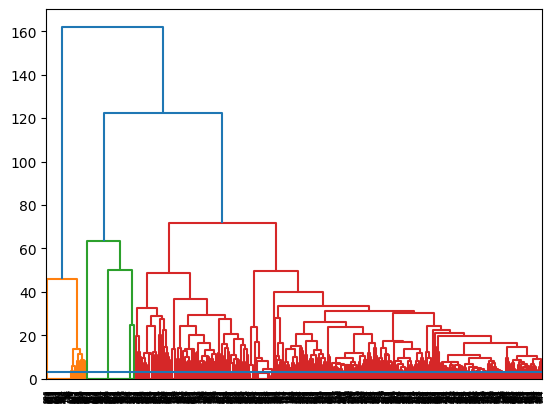

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Downsample your data for faster processing
downsampled_vectors = sent_vectors[:1000]  # Adjust the number based on your dataset size

# Perform hierarchical clustering and plot dendrogram
dendro = hierarchy.dendrogram(hierarchy.linkage(downsampled_vectors, method='ward'))
plt.axhline(y=3)  # Adjust the threshold for cutting the dendrogram
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  #took n=3 from dendrogram curve
Agg=cluster.fit_predict(sent_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
aggdfa = data
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

In [ ]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

###Word2Vec

In [79]:
import gensim
import numpy as np
from sklearn.cluster import KMeans

In [81]:
# Clean the 'CleanedText' column and split into words
list_of_sent_train = []
for sent in final['CleanedText'].values:
    filtered_sentence = []
    sent = cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if cleaned_words.isalpha():
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent_train.append(filtered_sentence)

# Train Word2Vec model
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=50, workers=4)

# Create sentence vectors using the trained Word2Vec model
sent_vectors = []
for sent in list_of_sent_train:
    sent_vec = np.zeros(100) # Initialize vector for each sentence
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    if cnt_words != 0:
        sent_vec /= cnt_words # Take average
    sent_vectors.append(sent_vec)

# Convert the list of sentence vectors into a numpy array
sent_vectors = np.array(sent_vectors)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(sent_vectors)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

In [84]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = 5)
model2.fit(sent_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [85]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [86]:
word_cluster_center[1:2]

array([[ 0.86877996, -0.50159067, -0.1744433 ,  0.1580675 ,  0.04680164,
         0.3728932 , -0.00126302, -0.20454272,  0.9702448 ,  0.18833679,
         0.37529197,  0.07105506,  0.02260843,  0.17618394, -0.51394083,
         0.23625347,  0.08187308,  0.53403067,  0.02920933,  0.44904397,
        -0.09552963, -0.21724272, -0.33836417, -0.46956416,  0.06390782,
        -0.13051417,  0.34497668, -0.48563282,  0.62469898,  0.0425795 ,
        -0.62987885, -0.10424666, -0.03866826,  0.20404839,  0.21766138,
        -0.13164649,  0.02186075,  0.69405028,  0.43948723, -0.18417464,
         0.57788899,  0.11095107, -0.08744132,  0.42495906,  0.04842865,
         0.36157345,  0.27711754,  0.23242746,  0.4243067 ,  0.21013464,
        -1.03226675,  0.18277226,  0.50587737,  0.11178765,  0.25079064,
        -0.2695717 ,  0.19673266,  0.1795704 ,  0.63965702,  0.45107784,
        -0.09871969,  0.76683023, -0.05627631, -0.48653406,  0.54954798,
        -0.20672265, -0.44757962,  0.17476768,  0.3

In [87]:
dfa = data
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,DBS Cluster Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...,-1,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...,-1,2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas,-1,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love,-1,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...,-1,1


###BERT

In [88]:
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [89]:
def tokenize_and_encode(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    return input_ids

# Compute BERT embeddings
def compute_bert_embeddings(text):
    input_ids = torch.tensor(tokenize_and_encode(text)).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0][:, 0, :].numpy()  # Extract embeddings from the [CLS] token
    return embeddings

In [92]:
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
import numpy as np
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode text data
def tokenize_and_encode(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    return input_ids

def compute_bert_embeddings(text):
    max_length = 64 # Maximum token limit for BERT base model
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True)
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0][:, 0, :].numpy()  # Extract embeddings from the [CLS] token
    return embeddings

def compute_bert_embeddings_for_chunked(text):
    max_chunk_length = 32  # Define a chunk length that fits within BERT's maximum token limit
    chunks = [text[i:i + max_chunk_length] for i in range(0, len(text), max_chunk_length)]
    chunk_embeddings = [compute_bert_embeddings(chunk) for chunk in chunks]
    return np.concatenate(chunk_embeddings, axis=0)

# Loading dataset and extract text data from the 'Reviews' column
reviews = final['Reviews'].dropna().tolist()

embeddings = np.array([compute_bert_embeddings_for_chunked(text) for text in reviews])

# Performing clustering
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

for i in range(num_clusters):
    cluster_samples = np.array(reviews)[clusters == i]
    print(f"Cluster {i+1}:")
    print(cluster_samples)
    print()

KeyboardInterrupt: 

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

I've understood different clustering methods like K-means, DBSCAN, and Hierarchical clustering. K-means splits data into groups, DBSCAN finds clusters based on how crowded points are, and Hierarchical clustering makes a tree of clusters. On the other hand, I've also learned about Word2Vec and BERT, which help understand word meanings. Word2Vec gives word embeddings, while BERT gives more detailed, context-aware ones. Each method is useful in its own way, depending on what I'm trying to do with my data.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
This exercise was very time taking. It kept crashing my system
due to exhaustion in RAM space. I had to pay $10 for Colab Pro
to try it again and it still kept failing.

'''